In [1]:
import pandas as pd
from langdetect import detect

In [2]:
reviewss = pd.read_csv("Summarization 50.727 facebook playstore.csv", header=0, parse_dates=[0], index_col=0)

In [3]:
reviewss

,Original,Summary
0,good,good
1,Bsdk tum pahle post ganda hatao tab coment gan...,Bsdk tum pahle post ganda hatao tab coment gan...
2,good app,good app
3,good,good
4,hate answering questions,hate answering questions
...,...,...
50722,Dear facebook pls delete profile lock option m...,Dear facebook pls delete profile lock option m...
50723,good app,good app
50724,NaN,NaN
50725,Khankhan,Khankhan


In [5]:
def is_english(text):
    try:
        lang = detect(text)
        return lang == 'id'
    except:
        return False

count = 1
# Loop through the Series and remove non-English strings
for index, value in reviews.items():
    if not is_english(value):
        reviews.drop(index, inplace=True)
        
    if count%1000 == 0:
        print(f'{count} Done')
    count += 1


1000 Done
2000 Done
3000 Done
4000 Done
5000 Done
6000 Done
7000 Done
8000 Done
9000 Done
10000 Done
11000 Done
12000 Done
13000 Done
14000 Done
15000 Done
16000 Done
17000 Done
18000 Done
19000 Done
20000 Done
21000 Done
22000 Done
23000 Done
24000 Done
25000 Done
26000 Done
27000 Done
28000 Done
29000 Done
30000 Done
31000 Done
32000 Done
33000 Done
34000 Done
35000 Done
36000 Done
37000 Done
38000 Done
39000 Done
40000 Done
41000 Done
42000 Done
43000 Done
44000 Done
45000 Done
46000 Done
47000 Done
48000 Done
49000 Done
50000 Done


In [51]:
# len(reviews)

In [50]:
# reviews.to_csv("13.363 tokopedia playstore summarization.csv")

In [13]:
# reviewss = reviewss.apply(lambda x: x + "%%%")

In [14]:
# reviewss.to_csv('1000 Facebook Playstore English.csv')

In [3]:
# !pip install langdetect

In [9]:
import pandas as pd
from datetime import datetime
import string
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import ImageColorGenerator
import numpy as np
from PIL import Image

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv("Facebook_AppStore 12824 AppStore English.csv", header=0, parse_dates=[0], index_col=0, date_parser=parser)


In [3]:
df.head()

,review
date,
2023-05-31 19:37:51,"Upon opening the watch page, the first things ..."
2023-05-31 18:37:23,My account has been hacked and my information ...
2023-05-31 15:49:30,I think that my profile has been blocked from ...
2023-05-31 15:10:30,Long-time user who no longer posts on the plat...
2023-05-31 14:34:59,I did a experiment with posting liberal opinio...


In [4]:
reviews = df['review']

In [5]:
reviews.head()

date
2023-05-31 19:37:51    Upon opening the watch page, the first things ...
2023-05-31 18:37:23    My account has been hacked and my information ...
2023-05-31 15:49:30    I think that my profile has been blocked from ...
2023-05-31 15:10:30    Long-time user who no longer posts on the plat...
2023-05-31 14:34:59    I did a experiment with posting liberal opinio...
Name: review, dtype: object

In [6]:
reviews.tail()

date
2020-01-02 18:53:13    When typing a comment, I can only get a few wo...
2020-01-02 12:07:05    This new stuff is horrible Facebook was fine b...
2020-01-02 08:38:37    For a while now I have been having issues with...
2020-01-02 08:34:43    So since the new update I logged out and I tri...
2020-01-02 04:39:56    The app is bloated with ads, promotions, and a...
Name: review, dtype: object

In [7]:
len(reviews)

12824

In [8]:
all_reviews = ' '.join(reviews.astype(str).tolist())
all_reviews[:1000]

'Upon opening the watch page, the first things I saw were extremely graphic in nature and clearly went against the “community guidelines” yet the content had been running live for hours. Reports do nothing. It disturbs me to think about how children could be stumbling upon stuff like this in the app, it’s terrible. Facebook provides nothing but bad things and wastes of time in that section of their app. The marketplace may be the only half-useful feature. My account has been hacked and my information has been changed, I can’t contact Facebook to get my account back. I am incredibly upset about this. You need to create a sure way to be contacted when there is an issue. I’m completely done with Facebook now because 16 yrs of my life is now gone and so is my phone possibly along with other accounts that are linked with Facebook. I am incredibly upset and just over it with you. 😡😡😡 I think that my profile has been blocked from making an avatar on Facebook. It always says to update your app

In [10]:
# NLTK tokenization
words = word_tokenize(all_reviews)

# Remove symbols and emoticons
filtered_words = [re.sub(r'[^\w\s]', '', word) for word in words]

# Remove stopwords
nltk.download('stopwords')
stopwords_en = set(stopwords.words('english'))
filtered_words = [word for word in filtered_words if word.lower() not in stopwords_en]

# manual_sw = ["facebook","app"]
# filtered_words = [word for word in filtered_words if word.lower() not in manual_sw]
filtered_reviews2 = ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Create the mask
masking = np.array(Image.open('Facebook.png'))

#Grab the mask colors
colors = ImageColorGenerator(masking)

In [30]:
# Generate the word cloud with additional parameters
wordcloud_rsw = WordCloud(
    width=2143,
    height=2143,
    background_color='black',
    color_func=colors,
    mask=masking,
    contour_color='blue',
    contour_width=1,
    font_path='KlavikaRegular-TF.otf',
    max_words=100,
    max_font_size=500
).generate(filtered_reviews2)

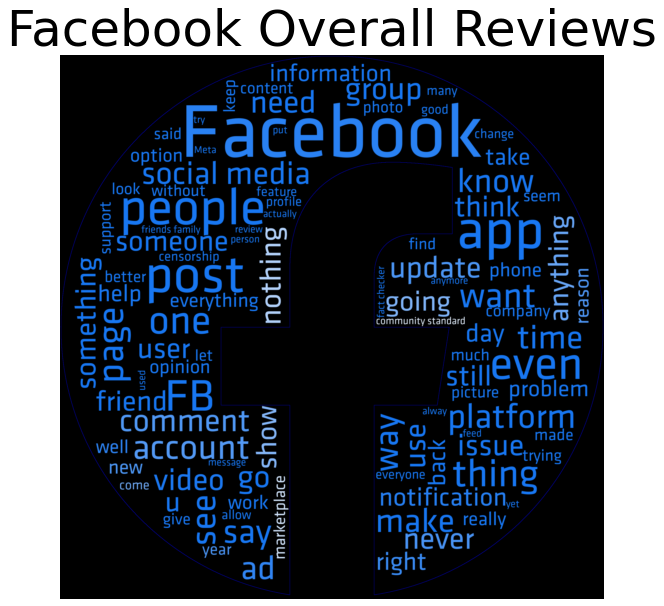

In [31]:
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_rsw, interpolation='bilinear')
plt.axis('off')
plt.title('Facebook Overall Reviews', fontsize=50, color='black')
plt.show()

In [13]:
dfs = pd.read_csv("Facebook_AppStore 500 newest since Mei AppStore English reviews sentiment.csv", header=0, parse_dates=[0], index_col=0)

In [14]:
dfs.head()

,review,sentiment
0,"Upon opening the watch page, the first things ...",-1
1,My account has been hacked and my information ...,-1
2,I think that my profile has been blocked from ...,-1
3,Long-time user who no longer posts on the plat...,-1
4,I did a experiment with posting liberal opinio...,-1


In [15]:
dfs.tail()

,review,sentiment
516,"I can't believe you guys, it's annoying to not...",-1
517,I think they’re business model exploits human ...,-1
518,The app and the entertainment its provides is ...,-1
519,I’ve recently gotten a new phone and i had to ...,-1
520,I been hacked twice an blocked but Facebook de...,-1


In [16]:
dfs_sentiment_positive = dfs[dfs['sentiment'] == 1]
dfs_sentiment_negative = dfs[dfs['sentiment'] == -1]
dfs_sentiment_neutral = dfs[dfs['sentiment'] == 0]

In [17]:
print(len(dfs_sentiment_positive),len(dfs_sentiment_negative),len(dfs_sentiment_neutral))

14 482 22


In [33]:
def word_cloud(dfs_reviews,sentiment):
    reviews = dfs_reviews.iloc[:,0]
    all_reviews = ' '.join(reviews.astype(str).tolist())
    
    # NLTK tokenization
    words = word_tokenize(all_reviews)

    # Remove symbols and emoticons
    filtered_words = [re.sub(r'[^\w\s]', '', word) for word in words]

    # Remove stopwords
    nltk.download('stopwords')
    stopwords_en = set(stopwords.words('english'))
    filtered_words = [word for word in filtered_words if word.lower() not in stopwords_en]

#     manual_sw = ["facebook","app"]
#     filtered_words = [word for word in filtered_words if word.lower() not in manual_sw]
    filtered_reviews2 = ' '.join(filtered_words)

    # Generate the word cloud with additional parameters
    wordcloud_rsw = WordCloud(
        width=2143,
        height=2143,
        background_color='black',
        color_func=colors,
        mask=masking,
        contour_color='blue',
        contour_width=1,
        font_path='KlavikaRegular-TF.otf',
        max_words=100,
        max_font_size=500
    ).generate(filtered_reviews2)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud_rsw, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Facebook {sentiment} Reviews', fontsize=50, color='black')
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


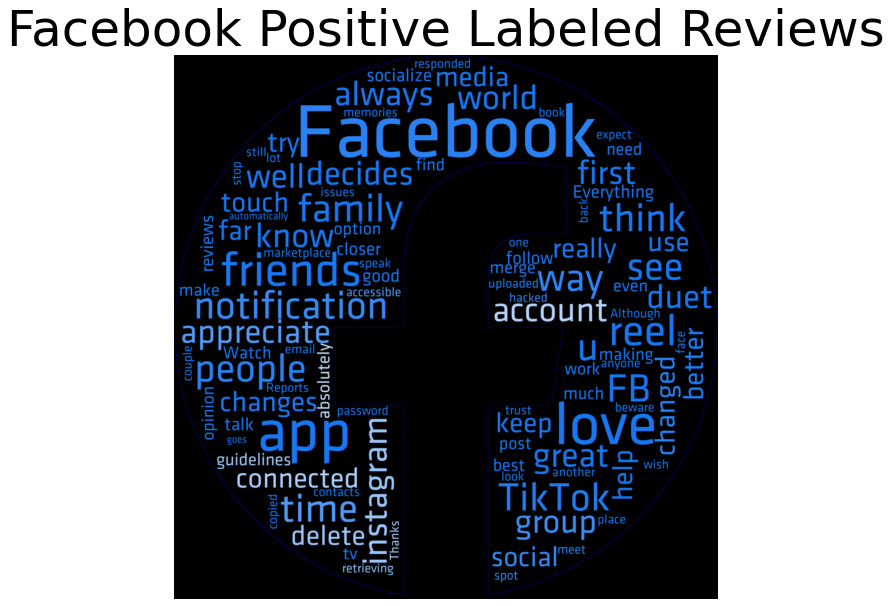

In [34]:
word_cloud(dfs_sentiment_positive,sentiment='Positive Labeled')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


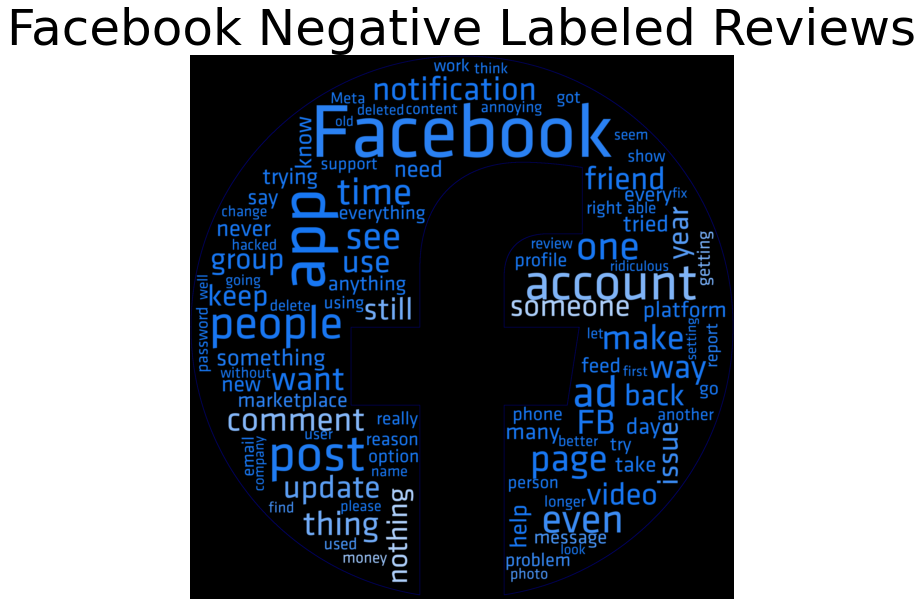

In [35]:
word_cloud(dfs_sentiment_negative,sentiment='Negative Labeled')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\agung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


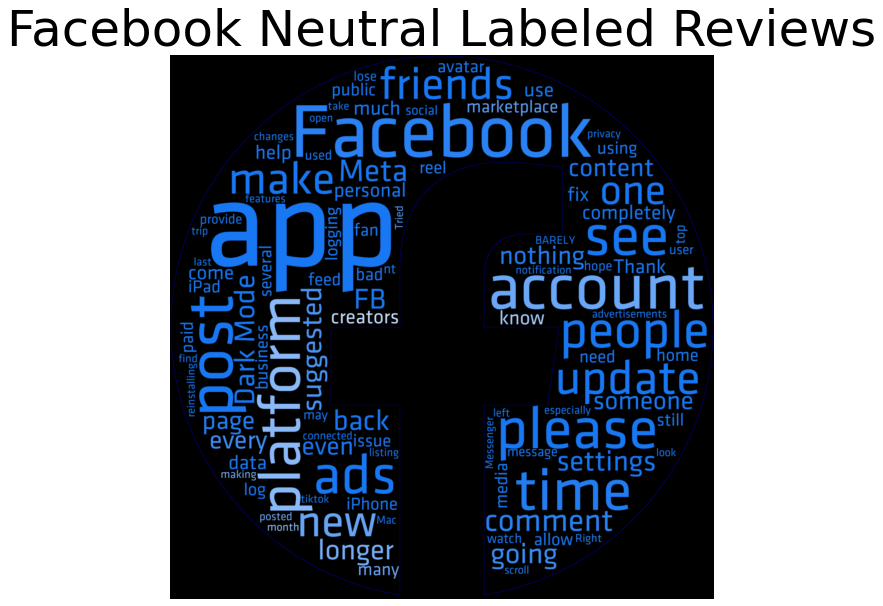

In [36]:
word_cloud(dfs_sentiment_neutral,sentiment='Neutral Labeled')